## Group: 8
## Project: Two-Stage Direct Response Model

### Read in data

In [31]:
# import libraries for reading in csv data
import pandas as pd
import random
random.seed(12345)
import datetime
import numpy as np
import seaborn as sns
import sys
import itertools
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from interpret.perf import ROC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, SelectFpr, chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import (mean_squared_error, r2_score, accuracy_score, roc_auc_score, mean_squared_error)
from sklearn.tree import DecisionTreeRegressor

print("Python version:", sys.version)
NTHREAD = 4
SEED = 12345

Python version: 3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]


In [2]:
# read csv files, store as dataframes
transfile=pd.read_csv('Data/Transfile.csv')
demofile=pd.read_csv('Data/Demofile.csv')
target_file=pd.read_csv('Data/Target1stPrtyfile.csv')

### Studying raw data

In [3]:
transfile.head()

,masterprimaryid,append_animal_welfare,append_animal,append_env,append_humanitarian,append_parks_nature,append_advocacy_political,append_civilrights,append_education,append_religion,...,append_wildlifewarriors,append_fundraisingpartners,append_competitors,append_direct_trans,append_web,append_dollar_life,append_trans_life,append_dollar_0_12M,append_env_enthusiasts,run_date
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,1,3,2,9,0,873,87,100,2,19DEC2023
1,0000257D-E8FD-4D5D-A589-EB04519D655F,0,0,5,0,0,0,0,0,0,...,0,0,9,0,1,10010,121,630,5,19DEC2023
2,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,9836,119,0,0,19DEC2023
3,0000357F-B1E3-4A2E-9736-345D032DA73E,1,3,47,1,7,0,0,0,4,...,5,28,68,51,0,43947,821,2871,13,19DEC2023
4,00004DFC-048B-41B2-B7BC-723FB3383150,0,0,7,0,0,0,0,0,0,...,0,0,13,7,3,24196,211,1512,4,19DEC2023


In [4]:
demofile.head()

,masterprimaryid,append_NetWorth,append_HomeValue,append_age,append_age_indicator,append_WealthResources,append_HouseHoldEducation,append_enviroconquintile,append_FamilyComp,append_MaritalStatus,append_mt_OnlineInsuranceBuyer,append_mt_CultureArtsEvents,append_mt_HighDollarDonor,append_mt_LowDollarDonor,birth_year,append_ethnicity,append_ethnicitygrp,run_date
0,000004E1-D14E-42AB-A384-40A2773F507C,0,430.0,46.0,H,2,4,NaN,14.0,NaN,71.0,16.0,70.0,29.0,1977.0,Thai,Far Eastern,20DEC2023
1,0000257D-E8FD-4D5D-A589-EB04519D655F,10,500.0,52.0,S,10,4,NaN,2.0,NaN,21.0,18.0,4.0,39.0,1971.0,Italian,Mediterranean,20DEC2023
2,000026B3-046F-4E71-9C90-9BDEF05882F5,4,241.0,84.0,S,3,4,NaN,14.0,NaN,16.0,27.0,59.0,15.0,1939.0,English,Western European,20DEC2023
3,0000357F-B1E3-4A2E-9736-345D032DA73E,9,186.0,87.0,S,8,5,NaN,12.0,NaN,62.0,15.0,3.0,25.0,1936.0,English,Western European,20DEC2023
4,00004DFC-048B-41B2-B7BC-723FB3383150,9,685.0,38.0,A,8,5,NaN,11.0,NaN,85.0,15.0,20.0,12.0,1985.0,NaN,NaN,20DEC2023


In [5]:
target_file.head()

,PrimaryKey,masterprimaryid,TGTresp,TGTgiftamt,LifeCycle,LifeCycleDetail,GivingYears,cumul_amount,first_gift_amount,first_gift_channel,...,HPG_channel,MRG_amount,MRG_channel,Prior_Channel_Behavior,Monthsback,donor_status,Monthly_Donor,avg_gift_amt,YE_Behavior,Gift_Behavior
0,000004E1-D14E-42AB-A384-40A2773F507C|AHOMA2010...,000004E1-D14E-42AB-A384-40A2773F507C,0,0.0,Lapsed,Lapsed 13-24 Mos,1,$10.00,$10.00,Offline,...,Offline,$10.00,Offline,No Prior Giving,13,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
1,000004E1-D14E-42AB-A384-40A2773F507C|AHOMA2010...,000004E1-D14E-42AB-A384-40A2773F507C,0,0.0,Lapsed,Lapsed 13-24 Mos,1,$10.00,$10.00,Offline,...,Offline,$10.00,Offline,No Prior Giving,13,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
2,000004E1-D14E-42AB-A384-40A2773F507C|AILMA2011...,000004E1-D14E-42AB-A384-40A2773F507C,0,0.0,Lapsed,Lapsed 13-24 Mos,1,$10.00,$10.00,Offline,...,Offline,$10.00,Offline,No Prior Giving,14,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
3,000004E1-D14E-42AB-A384-40A2773F507C|AILMA2111...,000004E1-D14E-42AB-A384-40A2773F507C,0,0.0,Lapsed,Lapsed 25-36 Mos,1,$10.00,$10.00,Offline,...,Offline,$10.00,Offline,No Prior Giving,27,36 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
4,0000257D-E8FD-4D5D-A589-EB04519D655F|AGAMA2011...,0000257D-E8FD-4D5D-A589-EB04519D655F,0,0.0,Consecutive Givers,Consecutive 5+ Years,19,"$2,760.00",$30.00,Offline,...,Offline,$20.00,Offline,Offline Only,1,less than 12months,Y,20.597015,A: Both YE and Non YE,A: All


In [6]:
trans_ct = transfile.count()
demo_ct = demofile.count()
target_ct = target_file.count()

print(f'num rows in transfile: {trans_ct}\nnum rows in demofile: {demo_ct}\nnum rows in target_file: {target_ct}')

num rows in transfile: masterprimaryid               1006110
append_animal_welfare         1006110
append_animal                 1006110
append_env                    1006110
append_humanitarian           1006110
append_parks_nature           1006110
append_advocacy_political     1006110
append_civilrights            1006110
append_education              1006110
append_religion               1006110
append_medsvcs_supp           1006110
append_cure                   1006110
append_spaces                 1006110
append_guardian_angles        1006110
append_wildlifewarriors       1006110
append_fundraisingpartners    1006110
append_competitors            1006110
append_direct_trans           1006110
append_web                    1006110
append_dollar_life            1006110
append_trans_life             1006110
append_dollar_0_12M           1006110
append_env_enthusiasts        1006110
run_date                      1006110
dtype: int64
num rows in demofile: masterprimaryid               

### Join all files for one dataset

In [7]:
# inner join on all three csv files using masterprimaryid
all_fields = transfile.merge(demofile, how='inner', on='masterprimaryid').merge(target_file, how='inner', on='masterprimaryid')
all_fields.head()

,masterprimaryid,append_animal_welfare,append_animal,append_env,append_humanitarian,append_parks_nature,append_advocacy_political,append_civilrights,append_education,append_religion,...,HPG_channel,MRG_amount,MRG_channel,Prior_Channel_Behavior,Monthsback,donor_status,Monthly_Donor,avg_gift_amt,YE_Behavior,Gift_Behavior
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,Offline,$10.00,Offline,No Prior Giving,13,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
1,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,Offline,$10.00,Offline,No Prior Giving,13,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
2,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,Offline,$10.00,Offline,No Prior Giving,14,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
3,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,Offline,$10.00,Offline,No Prior Giving,27,36 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
4,0000257D-E8FD-4D5D-A589-EB04519D655F,0,0,5,0,0,0,0,0,0,...,Offline,$20.00,Offline,Offline Only,1,less than 12months,Y,20.597015,A: Both YE and Non YE,A: All


In [8]:
# viewing size, column names, and column types of all_fields
all_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276648 entries, 0 to 3276647
Data columns (total 62 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   masterprimaryid                 object 
 1   append_animal_welfare           int64  
 2   append_animal                   int64  
 3   append_env                      int64  
 4   append_humanitarian             int64  
 5   append_parks_nature             int64  
 6   append_advocacy_political       int64  
 7   append_civilrights              int64  
 8   append_education                int64  
 9   append_religion                 int64  
 10  append_medsvcs_supp             int64  
 11  append_cure                     int64  
 12  append_spaces                   int64  
 13  append_guardian_angles          int64  
 14  append_wildlifewarriors         int64  
 15  append_fundraisingpartners      int64  
 16  append_competitors              int64  
 17  append_direct_trans        

### Handling non-numeric x variables

In [9]:
# function for creating dummies for categorical variables
def create_dummies(x, all_fields):
    temp_df = pd.get_dummies(all_fields[x], prefix=x, dtype=int)
    all_fields = pd.concat([all_fields, temp_df], axis=1)
    return all_fields

categorical_vars = ['Monthly_Donor', 'donor_status', 'YE_Behavior', 'Gift_Behavior', 'Prior_Channel_Behavior', 'MRG_channel', 'HPG_channel',
                     'LifeCycle', 'LifeCycleDetail', 'first_gift_channel', 'append_FamilyComp']

for x in categorical_vars:
    all_fields = create_dummies(x, all_fields)

In [10]:
# dropping columns which were converted to dummies, plus a few we don't intend to use
all_fields = all_fields.drop(columns=['append_ethnicitygrp', 'append_ethnicity', 'first_gift_channel', 'LifeCycleDetail', 'LifeCycle',
                                     'HPG_channel', 'MRG_channel', 'Prior_Channel_Behavior', 'Gift_Behavior', 'YE_Behavior', 'donor_status',
                                     'Monthly_Donor', 'append_MaritalStatus', 'append_spaces', 'append_FamilyComp'])

In [11]:
# converting currency strings to float type
# ignore warning
all_fields['HPG_amount'] = all_fields['HPG_amount'].str.replace('$', '').str.replace(',', '').astype('float')
all_fields['MRG_amount'] = all_fields['MRG_amount'].str.replace('$', '').str.replace(',', '').astype('float')
all_fields['cumul_amount'] = all_fields['cumul_amount'].str.replace('$', '').str.replace(',', '').astype('float')
all_fields['first_gift_amount'] = all_fields['first_gift_amount'].str.replace('$', '').str.replace(',', '').astype('float')

In [12]:
# checking in on what our data looks like now
all_fields.head()

,masterprimaryid,append_animal_welfare,append_animal,append_env,append_humanitarian,append_parks_nature,append_advocacy_political,append_civilrights,append_education,append_religion,...,append_FamilyComp_7.0,append_FamilyComp_8.0,append_FamilyComp_9.0,append_FamilyComp_10.0,append_FamilyComp_11.0,append_FamilyComp_12.0,append_FamilyComp_13.0,append_FamilyComp_14.0,append_FamilyComp_15.0,append_FamilyComp_16.0
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0000257D-E8FD-4D5D-A589-EB04519D655F,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
all_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276648 entries, 0 to 3276647
Columns: 108 entries, masterprimaryid to append_FamilyComp_16.0
dtypes: float64(14), int64(89), object(5)
memory usage: 2.6+ GB


### Missing Values

In [14]:
missing_values_count = all_fields.isnull().sum()

In [15]:
print(missing_values_count)

masterprimaryid           0
append_animal_welfare     0
append_animal             0
append_env                0
append_humanitarian       0
                         ..
append_FamilyComp_12.0    0
append_FamilyComp_13.0    0
append_FamilyComp_14.0    0
append_FamilyComp_15.0    0
append_FamilyComp_16.0    0
Length: 108, dtype: int64


In [16]:
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

masterprimaryid: 0
append_animal_welfare: 0
append_animal: 0
append_env: 0
append_humanitarian: 0
append_parks_nature: 0
append_advocacy_political: 0
append_civilrights: 0
append_education: 0
append_religion: 0
append_medsvcs_supp: 0
append_cure: 0
append_guardian_angles: 0
append_wildlifewarriors: 0
append_fundraisingpartners: 0
append_competitors: 0
append_direct_trans: 0
append_web: 0
append_dollar_life: 0
append_trans_life: 0
append_dollar_0_12M: 0
append_env_enthusiasts: 0
run_date_x: 0
append_NetWorth: 0
append_HomeValue: 2
append_age: 23215
append_age_indicator: 23215
append_WealthResources: 0
append_HouseHoldEducation: 0
append_enviroconquintile: 3276183
append_mt_OnlineInsuranceBuyer: 68778
append_mt_CultureArtsEvents: 68778
append_mt_HighDollarDonor: 68778
append_mt_LowDollarDonor: 68778
birth_year: 23215
run_date_y: 0
PrimaryKey: 0
TGTresp: 0
TGTgiftamt: 0
GivingYears: 0
cumul_amount: 0
first_gift_amount: 0
gift_count: 0
HPG_amount: 0
MRG_amount: 0
Monthsback: 0
avg_gift_amt

In [17]:
# let's apply the mean to missing values for the following columns:
    # append_mt_OnlineInsuranceBuyer
    # append_mt_CultureArtsEvents
    # append_mt_HighDollarDonor
    # append_mt_LowDollarDonor

columns_to_fill = [
    'append_mt_OnlineInsuranceBuyer',
    'append_mt_CultureArtsEvents',
    'append_mt_HighDollarDonor',
    'append_mt_LowDollarDonor'
]
# using the mean of each column to fill that column's nulls
for column in columns_to_fill:
        all_fields[column].fillna(all_fields[column].mean(), inplace=True)

In [18]:
# drop append_enviroconquintile
all_fields.drop('append_enviroconquintile', axis=1, inplace=True)

In [19]:
# Delete rows with missing values in the append_HomeValue column
all_fields.dropna(subset=['append_HomeValue'], inplace=True)

In [20]:
# aplly mean to missing values of age
mean_append_age = all_fields['append_age'].mean()
all_fields['append_age'].fillna(mean_append_age, inplace=True)

### Target Variables

In [21]:
all_fields['TGTgiftamt'].mean()

0.884472469714458

In [22]:
respGroups = all_fields.groupby(['TGTresp']).count()
respGroups

,masterprimaryid,append_animal_welfare,append_animal,append_env,append_humanitarian,append_parks_nature,append_advocacy_political,append_civilrights,append_education,append_religion,...,append_FamilyComp_7.0,append_FamilyComp_8.0,append_FamilyComp_9.0,append_FamilyComp_10.0,append_FamilyComp_11.0,append_FamilyComp_12.0,append_FamilyComp_13.0,append_FamilyComp_14.0,append_FamilyComp_15.0,append_FamilyComp_16.0
TGTresp,,,,,,,,,,,,,,,,,,,,,
0,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,...,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715
1,84931,84931,84931,84931,84931,84931,84931,84931,84931,84931,...,84931,84931,84931,84931,84931,84931,84931,84931,84931,84931


### Load Data

In [23]:
data = all_fields

In [24]:
x_names_df = data
# dropping some more x values we are not considering for model use
x_names_df = x_names_df.drop(columns=['PrimaryKey', 'TGTresp', 'TGTgiftamt', 'run_date_y', 'run_date_x', 'append_age_indicator', 'birth_year'])
x_names_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3276646 entries, 0 to 3276647
Data columns (total 100 columns):
 #   Column                                            Dtype  
---  ------                                            -----  
 0   masterprimaryid                                   object 
 1   append_animal_welfare                             int64  
 2   append_animal                                     int64  
 3   append_env                                        int64  
 4   append_humanitarian                               int64  
 5   append_parks_nature                               int64  
 6   append_advocacy_political                         int64  
 7   append_civilrights                                int64  
 8   append_education                                  int64  
 9   append_religion                                   int64  
 10  append_medsvcs_supp                               int64  
 11  append_cure                                       int64  
 12  appe

In [25]:
# for now (before completing model feature selection) we are loading data with all of the x values we are still considering
y_name = 'TGTresp'
x_names = x_names_df.columns.tolist()

In [26]:
SEED = 12345
np.random.seed(SEED) # preserve exact reproducibility for this cell

split_ratio = 0.7 # 70%/30% train/test split

# execute split
split = np.random.rand(len(data)) < split_ratio
train = data[split]
valid = data[~split]

# summarize split
print('Train data rows = %d, columns = %d' % (train.shape[0], train.shape[1]))
print('Validation data rows = %d, columns = %d' % (valid.shape[0], valid.shape[1]))

# exp.data_loader(data=train[x_names+[y_name]])

Train data rows = 2293543, columns = 107
Validation data rows = 983103, columns = 107


In [27]:
# training data filtered to contain only rows where TGTresp = 1
respGroups = train.groupby(['TGTresp'])
train_responders = respGroups.get_group(1)

In [28]:
# test data filtered to contain only rows where TGTresp = 1
respGroups = valid.groupby(['TGTresp'])
test_responders = respGroups.get_group(1)

In [29]:
print('Train data rows = %d, columns = %d' % (train_responders.shape[0], train_responders.shape[1]))
print('Validation data rows = %d, columns = %d' % (test_responders.shape[0], test_responders.shape[1]))

Train data rows = 59269, columns = 107
Validation data rows = 25662, columns = 107


In [677]:
def model_grid(train, valid, x_names, y_name, model_type, model_params=None, n_models=None, seed=None):
    
    """ Performs a random grid search over n_models and model_params.

    :param train_x: X training data as Pandas DataFrame.
    :param train_y: Y training data as Pandas DataFrame.
    :param test_x: X validation data as Pandas DataFrame.
    :param test_y: Y validation data as Pandas DataFrame.
    :param gs_params: Dictionary of lists of potential EBM parameters over which to search.   
    :param n_models: Number of random models to evaluate.
    :param early_stop_thres: GAMI-NET early stopping threshold.
    :param random_state: Random seed for better interpretability.
    :return: Best candidate model from random grid search.

    """

    # cartesian product of gs_params
    keys, values = zip(*model_params.items())
    experiments = [dict(zip(keys, v)) for v in itertools.product(*values)]

    # preserve exact reproducibility for this function
    np.random.seed(SEED) 
    
    # select randomly from cartesian product space
    selected_experiments = np.random.choice(len(experiments), n_models)

    # set global params for seed, etc.
    params = {'random_state': SEED}

    # init grid search loop
    best_candidate = None
    best_score = 0
    best_mse = 4000

    # grid search loop
    #exp = Experiment()
    for i, exper in enumerate(selected_experiments):

        params.update(experiments[exper])  # override global params with current grid run params

        print('Grid search run %d/%d:' % (int(i + 1), int(n_models)))
        print('Training with parameters:', params)
        
        # train 
        current_model = model_type(**params)
        print(current_model)
        candidate = current_model.fit(train[x_names], train[y_name])
        
        # calculate AUC for classification models:
        if model_type in [DecisionTreeClassifier, LogisticRegression, ExtraTreesClassifier, RandomForestClassifier]:
            #perf = ROC(current_model.predict_proba).explain_perf(valid[x_names], valid[y_name])
            perf = f1_score(valid[y_name], current_model.predict(valid[x_names]))
            #candidate_best_score = perf._internal_obj['overall']['auc']
            candidate_best_score = perf

            # determine if current model is better than previous best
            if candidate_best_score > best_score:
                best_candidate = candidate
                best_score = candidate_best_score
                print('Grid search new best score discovered at iteration %d/%d: %.4f.' %
                                 (int(i + 1), int(n_models), candidate_best_score))
    
            print('---------- ----------')

        else:
            regr_trans = TransformedTargetRegressor(regressor=current_model, transformer=QuantileTransformer(output_distribution='normal'))
            regr_trans.fit(train[x_names], train[y_name])
            ypred = regr_trans.predict(valid[x_names])
            ypred = ypred.astype(float)
            mse_pred = round(mean_squared_error(valid[y_name], ypred),3)
            # determine if current model is better than previous best
            if mse_pred < best_mse:
                best_candidate = candidate
                best_mse = mse_pred
                print('Grid search new best mse discovered at iteration %d/%d: %.4f.' %
                                 (int(i + 1), int(n_models), mse_pred))
    
            print('---------- ----------')
        
        del current_model
            
    return best_candidate

### Phase 1 Feature Selection

In [33]:
feature_sel = x_names
feature_sel.remove('masterprimaryid')

In [34]:
treekbest = make_pipeline(SelectKBest(score_func=chi2, k=20), RandomForestClassifier(random_state=12345))
treekbest.fit(train[feature_sel], train[y_name])

Pipeline(steps=[('selectkbest',
                 SelectKBest(k=20, score_func=<function chi2 at 0x174c47100>)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=12345))])

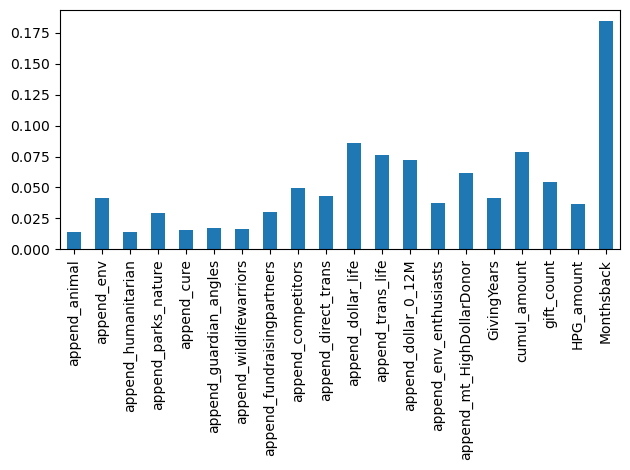

In [35]:
index_features = treekbest[:-1].get_feature_names_out()
pd.Series(treekbest[-1].feature_importances_, index=index_features).plot.bar()
plt.tight_layout()

In [36]:
treekbest[:-1].get_feature_names_out()

array(['append_animal', 'append_env', 'append_humanitarian',
       'append_parks_nature', 'append_cure', 'append_guardian_angles',
       'append_wildlifewarriors', 'append_fundraisingpartners',
       'append_competitors', 'append_direct_trans', 'append_dollar_life',
       'append_trans_life', 'append_dollar_0_12M',
       'append_env_enthusiasts', 'append_mt_HighDollarDonor',
       'GivingYears', 'cumul_amount', 'gift_count', 'HPG_amount',
       'Monthsback'], dtype=object)

## Phase 1 Models

In [67]:
# final selected features
# based on combination of selectKbest feature selection and review of all features' distributions
x_names = ['append_animal',
 'append_env',
 'append_wildlifewarriors',
 'append_fundraisingpartners',
 'append_competitors',
 'append_env_enthusiasts',
 'append_direct_trans',
 'YE_Behavior_A: Both YE and Non YE',
 'Gift_Behavior_A: All',
 'Gift_Behavior_D: Others Only',
 'LifeCycleDetail_Consecutive 5+ Years',
 'LifeCycle_Consecutive Givers',
 'GivingYears',
 'cumul_amount',
 'append_trans_life',
 'Monthly_Donor_Y',
 'Monthly_Donor_N',
 'gift_count',
 'append_parks_nature']

In [68]:
train[x_names]

,append_animal,append_env,append_wildlifewarriors,append_fundraisingpartners,append_competitors,append_env_enthusiasts,append_direct_trans,YE_Behavior_A: Both YE and Non YE,Gift_Behavior_A: All,Gift_Behavior_D: Others Only,LifeCycleDetail_Consecutive 5+ Years,LifeCycle_Consecutive Givers,GivingYears,cumul_amount,append_trans_life,Monthly_Donor_Y,Monthly_Donor_N,gift_count,append_parks_nature
1,0,62,1,3,2,2,9,0,0,1,0,0,1,10.0,87,0,1,1,0
2,0,62,1,3,2,2,9,0,0,1,0,0,1,10.0,87,0,1,1,0
3,0,62,1,3,2,2,9,0,0,1,0,0,1,10.0,87,0,1,1,0
4,0,5,0,0,9,5,0,1,1,0,1,1,19,2760.0,121,1,0,134,0
5,0,5,0,0,9,5,0,1,1,0,1,1,20,3000.0,121,1,0,146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276640,0,19,0,1,21,5,7,0,0,1,0,0,1,25.0,117,0,1,1,5
3276641,0,19,0,1,21,5,7,0,0,1,0,0,1,25.0,117,0,1,1,5
3276642,0,19,0,1,21,5,7,0,0,1,0,0,1,25.0,117,0,1,1,5
3276646,1,0,1,1,8,2,0,0,0,1,0,0,1,15.0,62,0,1,1,0


In [69]:
train[x_names].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2293543 entries, 1 to 3276647
Data columns (total 19 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   append_animal                         int64  
 1   append_env                            int64  
 2   append_wildlifewarriors               int64  
 3   append_fundraisingpartners            int64  
 4   append_competitors                    int64  
 5   append_env_enthusiasts                int64  
 6   append_direct_trans                   int64  
 7   YE_Behavior_A: Both YE and Non YE     int64  
 8   Gift_Behavior_A: All                  int64  
 9   Gift_Behavior_D: Others Only          int64  
 10  LifeCycleDetail_Consecutive 5+ Years  int64  
 11  LifeCycle_Consecutive Givers          int64  
 12  GivingYears                           int64  
 13  cumul_amount                          float64
 14  append_trans_life                     int64  
 15  Monthly_Donor_Y     

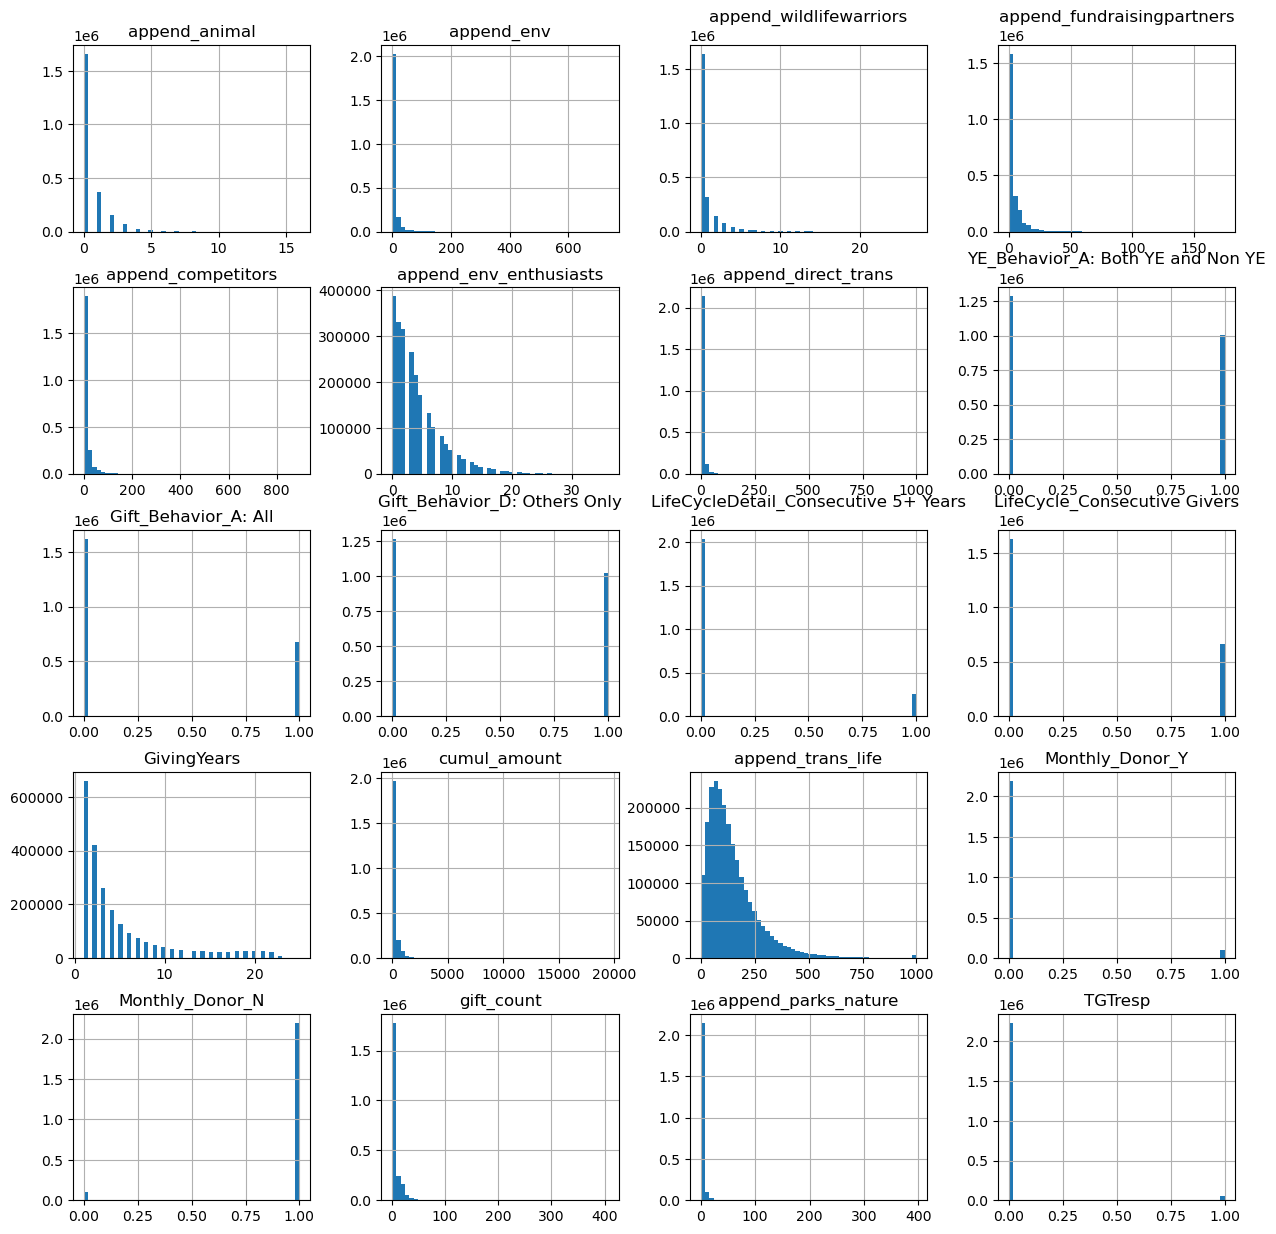

In [70]:
_ = train[x_names + ['TGTresp']].hist(bins=50, figsize=(15, 15))

In [71]:
respGroups = train.groupby(['TGTresp']).count()
respGroups

,masterprimaryid,append_animal_welfare,append_animal,append_env,append_humanitarian,append_parks_nature,append_advocacy_political,append_civilrights,append_education,append_religion,...,append_FamilyComp_7.0,append_FamilyComp_8.0,append_FamilyComp_9.0,append_FamilyComp_10.0,append_FamilyComp_11.0,append_FamilyComp_12.0,append_FamilyComp_13.0,append_FamilyComp_14.0,append_FamilyComp_15.0,append_FamilyComp_16.0
TGTresp,,,,,,,,,,,,,,,,,,,,,
0,2234274,2234274,2234274,2234274,2234274,2234274,2234274,2234274,2234274,2234274,...,2234274,2234274,2234274,2234274,2234274,2234274,2234274,2234274,2234274,2234274
1,59269,59269,59269,59269,59269,59269,59269,59269,59269,59269,...,59269,59269,59269,59269,59269,59269,59269,59269,59269,59269


In [ ]:
# dictionary of hyperparameter value lists for grid search

'''model_params = {'max_depth': [16,17,18,19],
                'n_estimators': [100,110,120,130],
              'min_samples_leaf': [16,17,18,19],
               'class_weight':[{0: 1, 1: 30},{0: 1, 1: 20},{0: 1, 1: 22},{0: 1, 1: 28}]}

# Decision Tree Classifier grid search
best_model = model_grid(train, valid, x_names, y_name, RandomForestClassifier, model_params=model_params, n_models=20, 
                    seed=SEED)'''

In [84]:
rftree = RandomForestClassifier(class_weight={0: 1, 1: 20}, max_depth=16,
                       min_samples_leaf=19, n_estimators=110,
                       random_state=12345).fit(train[x_names], train[y_name])


In [85]:
final_auc = roc_auc_score(valid[y_name], rftree.predict_proba(valid[x_names])[:, 1])
print(final_auc)

0.7368839688014089


In [86]:
# probabiliy predictions for validation data in classification tree model
rftree_probs=rftree.predict_proba(valid[x_names])
rftree_pred = rftree.predict(valid[x_names])

<Axes: >

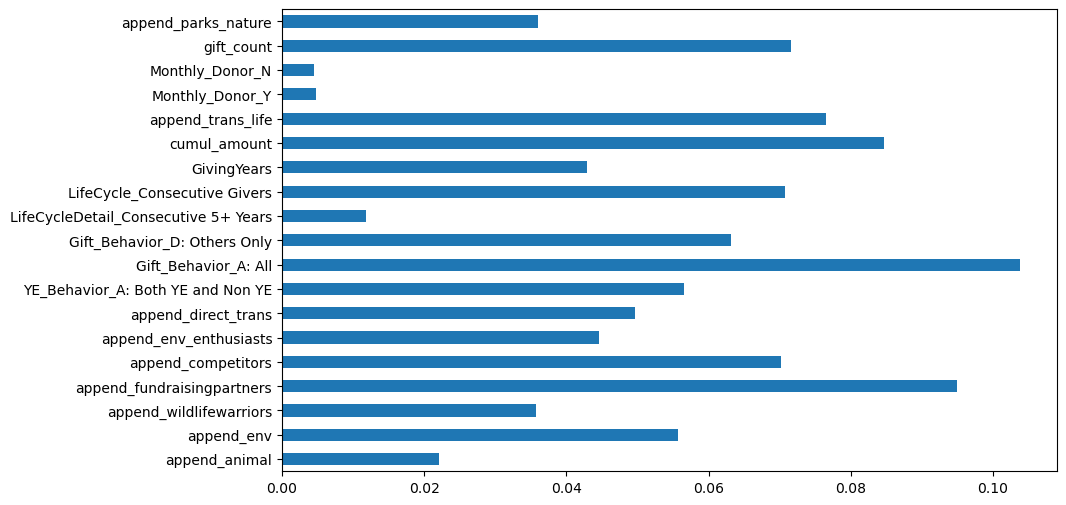

In [87]:
# feature importance for classification tree model
plt.figure(figsize=(10,6))
(pd.Series(rftree.feature_importances_, rftree.feature_names_in_)
   .plot(kind='barh'))

### Phase 1 Model Results

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [89]:
# dataframe for logistic regression test data predictions
result1 = pd.DataFrame(valid[['masterprimaryid', y_name]])
result1['pred'] = rftree_probs[:,1]
result1['TGT_pred'] = rftree_pred
result1

,masterprimaryid,TGTresp,pred,TGT_pred
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0.181639,0
6,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.092779,0
8,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.092779,0
10,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.461162,0
11,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.470031,0
...,...,...,...,...
3276636,FFFFCA06-BA99-4475-B616-FA84CAB719BB,0,0.112554,0
3276637,FFFFD24D-7BE2-41BD-9245-F19C69DCF614,0,0.223448,0
3276643,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.308729,0
3276644,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.411727,0


In [90]:
from sklearn.metrics import f1_score
final_f1 = f1_score(result1[y_name], result1['TGT_pred'])
final_f1

0.14073771859874265

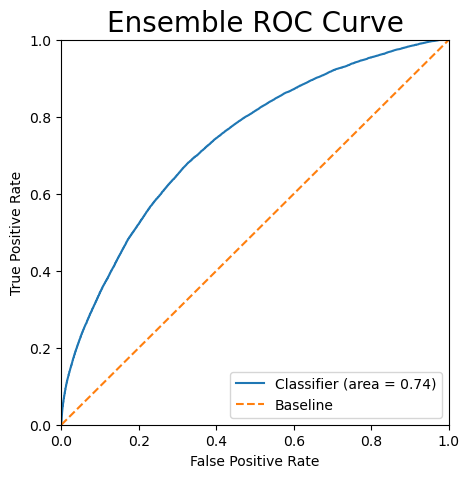

In [91]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(result1['TGTresp'], result1['pred'])

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % final_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Baseline', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Ensemble ROC Curve',fontsize = "20")
plt.legend(loc="lower right")
plt.show()

In [92]:
import scikitplot as skplt

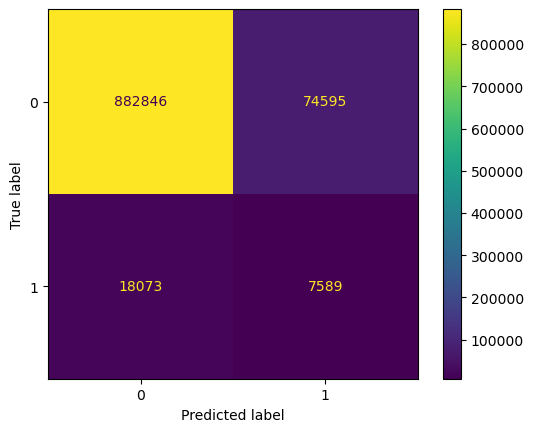

In [93]:
cm = confusion_matrix(result1[y_name], result1['TGT_pred'], labels=rftree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rftree.classes_)
disp.plot()
plt.show()

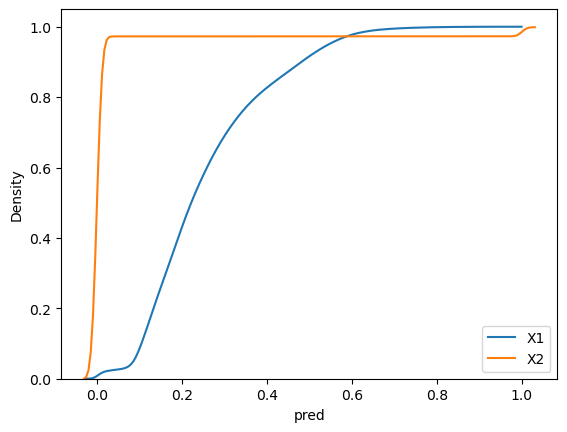

In [94]:
X1 = result1.pred
X2 = result1.TGTresp
sns.kdeplot(data = X1, cumulative = True, label = "X1")
sns.kdeplot(data = X2, cumulative = True, label = "X2")
plt.legend()
plt.show()

### Phase 2 Feature Selection

In [95]:
# viewing average gift amount in training data (without TGTresp = 0 rows)
avg_tgt_gift = train_responders['TGTgiftamt'].mean()
avg_tgt_gift

33.9646840675564

In [96]:
# re-conduct feature seleciton for regression model
y_name = 'TGTgiftamt'
#y_name = 'log_y'
x_names = x_names_df.columns.tolist()

In [97]:
feature_sel = x_names
feature_sel.remove('masterprimaryid')

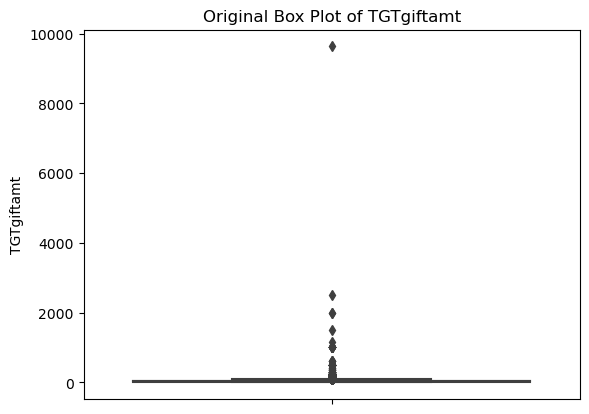

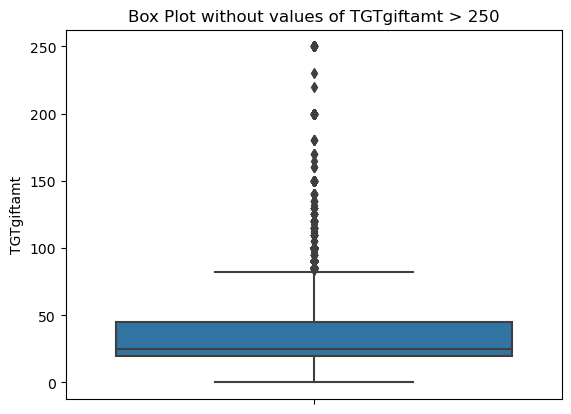

In [98]:
  
import seaborn as sns
import matplotlib.pyplot as plt
 
# viewing outliers
def removal_box_plot(df, column, threshold):
    sns.boxplot(data=df, y=column)
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
    sns.boxplot(data=removed_outliers, y=column)
    plt.title(f'Box Plot without values of {column} > 250')
    plt.show()
    return removed_outliers
 
 
threshold_value = 250

no_outliers = removal_box_plot(train_responders, 'TGTgiftamt', threshold_value)

In [99]:
# manipulating training data to use value of 250 for rows where TGTgiftamt > 250
train_responders.loc[train_responders['TGTgiftamt'] >= 250, 'TGTgiftamt'] = 250
ctr = 0
for index, row in train_responders.iterrows():
    if row["TGTgiftamt"] == 250:
        ctr += 1
print(ctr)

129


In [100]:
dtkbest = make_pipeline(SelectKBest(k=10), DecisionTreeRegressor(random_state=12345))
dtkbest.fit(train_responders[feature_sel], train_responders[y_name])

/Users/kylieloudermilk/Desktop/DNSC_6317/Project/venv/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [80 91 97] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/kylieloudermilk/Desktop/DNSC_6317/Project/venv/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Pipeline(steps=[('selectkbest', SelectKBest()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=12345))])

['append_religion' 'append_trans_life' 'append_NetWorth'
 'append_WealthResources' 'append_mt_CultureArtsEvents' 'cumul_amount'
 'first_gift_amount' 'HPG_amount' 'MRG_amount' 'avg_gift_amt']


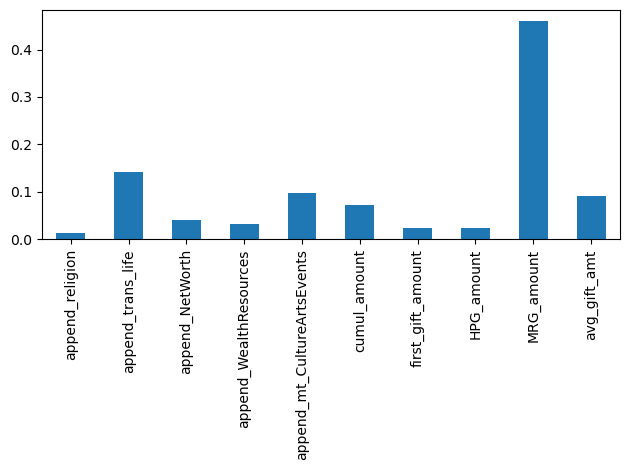

In [101]:
index_features = dtkbest[:-1].get_feature_names_out()
pd.Series(dtkbest[-1].feature_importances_, index=index_features).plot.bar()
plt.tight_layout()
print(dtkbest[:-1].get_feature_names_out())

In [102]:
# temp selected features
x_names_2 = ['HPG_amount',
 'MRG_amount',
 'cumul_amount',
 'avg_gift_amt',
 'first_gift_amount',
 'append_WealthResources',
 'append_mt_HighDollarDonor',
 'append_dollar_life',
 'gift_count',
 'Monthsback',
 'append_HouseHoldEducation',
 'append_trans_life',
 'append_NetWorth',
 'append_mt_CultureArtsEvents',
 'append_direct_trans',
 'append_fundraisingpartners',
 'GivingYears']


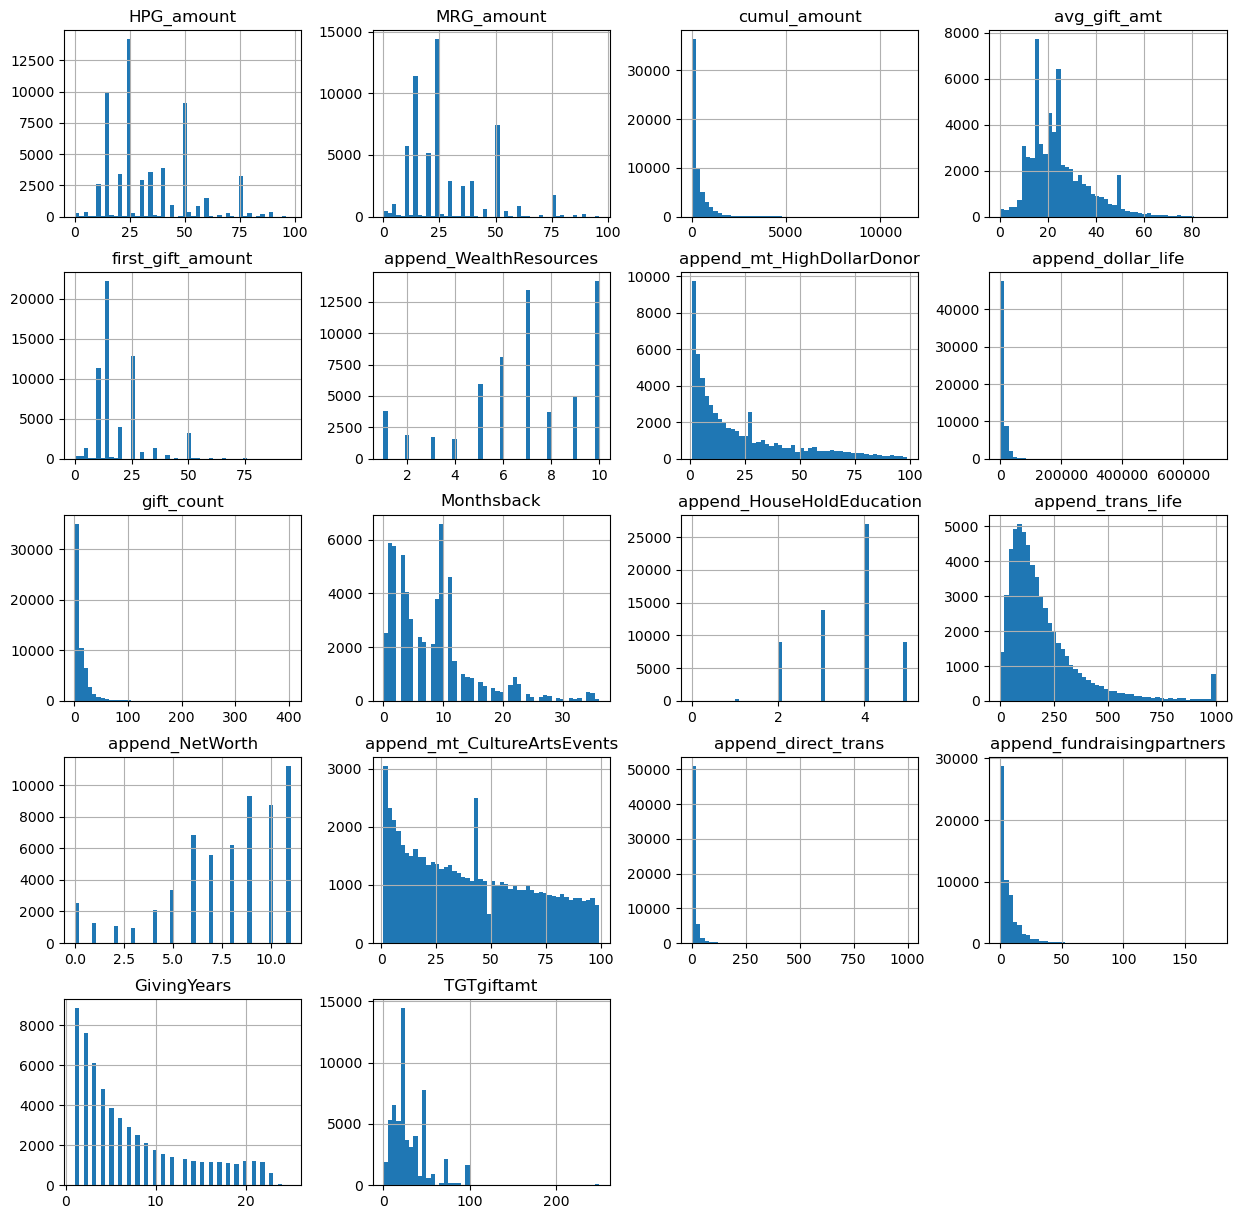

In [103]:
_ = train_responders[x_names_2 + ['TGTgiftamt']].hist(bins=50, figsize=(15, 15))

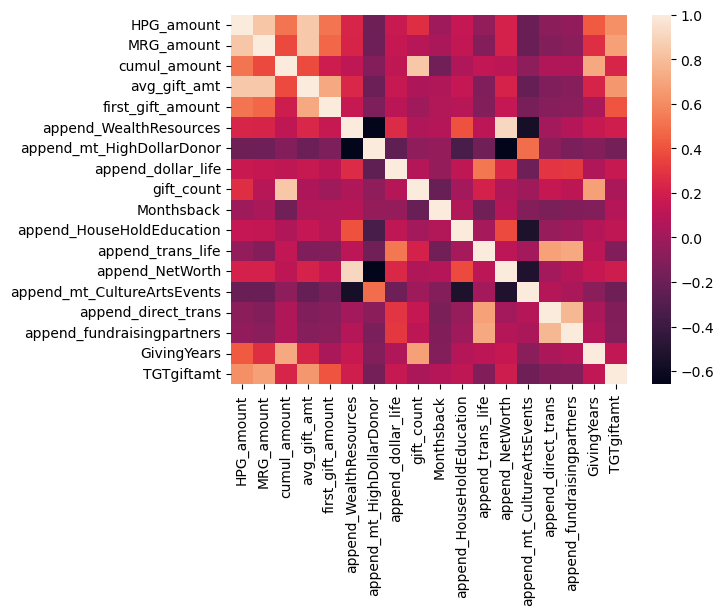

In [104]:
corr = train_responders[x_names_2 + ['TGTgiftamt']].corr()
_ = sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

In [ ]:
# reviewing relationships to TGTgiftamt
for x in x_names:
    train_responders.sample(n=10000, random_state=12345).plot(kind='scatter', x=x, y=y_name)

### Phase 2 Models

In [106]:
# final selected features
x_names_2 = ['HPG_amount',
 'MRG_amount',
 'avg_gift_amt',
 'first_gift_amount',
 'append_direct_trans',
 'append_fundraisingpartners',
 'append_HouseHoldEducation',
 'append_WealthResources',
 'append_age',
 'append_web',
 'append_competitors',
 'append_parks_nature']

In [ ]:
# dictionary of hyperparameter value lists for grid search
'''
model_params = {'max_depth': np.arange(1,50,1),
               'min_samples_leaf': np.arange(10,40,1),
               'min_samples_split': np.arange(2,10,1)}

# Decision Tree Regressor grid search
best_model = model_grid(train_responders, test_responders, x_names_2, y_name, DecisionTreeRegressor, model_params=model_params, n_models=200, 
                    seed=SEED)
print(best_model)'''

In [107]:
rf = RandomForestRegressor(random_state=12345)
rf.fit(train_responders[x_names_2], train_responders[y_name])

RandomForestRegressor(random_state=12345)

In [108]:
dt = DecisionTreeRegressor(random_state=12345)
dt.fit(train_responders[x_names_2], train_responders[y_name])

DecisionTreeRegressor(random_state=12345)

<Axes: title={'center': 'Random Forest Feature Importance'}>

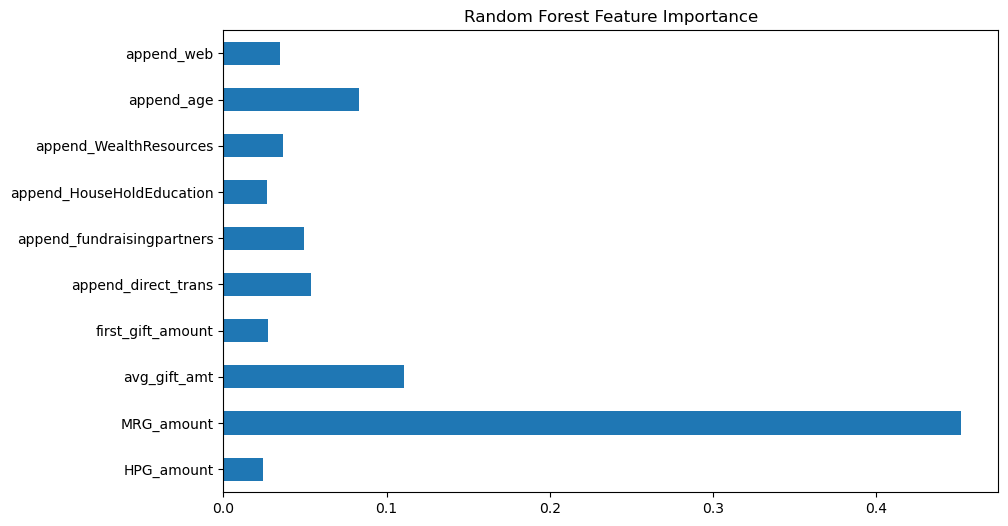

In [109]:
# random forest feature importance
plt.figure(figsize=(10,6))
(pd.Series(rf.feature_importances_[:10], rf.feature_names_in_[:10])
   .plot(title='Random Forest Feature Importance', kind='barh'))

<Axes: title={'center': 'Decision Tree Feature Importance'}>

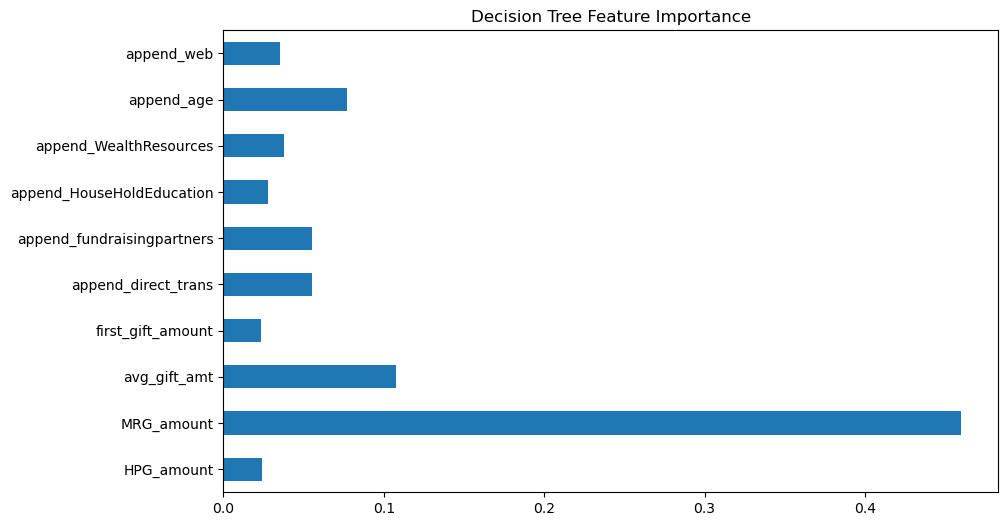

In [110]:
# decision tree feature importance
plt.figure(figsize=(10,6))
(pd.Series(dt.feature_importances_[:10], dt.feature_names_in_[:10])
     .plot(title='Decision Tree Feature Importance', kind='barh'))

In [111]:
# diagnostic and remediation imports
from sklearn.metrics import (mean_absolute_error, mean_squared_error)
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

In [112]:
# prediction MAE and MSE for Random Forest
rf_test_ypred = rf.predict(test_responders[x_names_2])
rf_mae_test_ypred = round(mean_absolute_error(test_responders[y_name], rf_test_ypred),3)
print("Random Forest MAE: ", rf_mae_test_ypred)
rf_mse_test_ypred = round(mean_squared_error(test_responders[y_name], rf_test_ypred),3)
print("Random Forest MSE: ", rf_mse_test_ypred)
print("Random Forest y predictions mean for test data: ", rf_test_ypred.mean())

Random Forest MAE:  11.02
Random Forest MSE:  3015.371
Random Forest y predictions mean for test data:  34.10299021821615


In [113]:
# prediction MAE and MSE for Decision Tree
dt_test_ypred = dt.predict(test_responders[x_names_2])
dt_mae_test_ypred = round(mean_absolute_error(test_responders[y_name], dt_test_ypred),3)
print("Decision Tree MAE: ", dt_mae_test_ypred)
dt_mse_test_ypred = round(mean_squared_error(test_responders[y_name], dt_test_ypred),3)
print("Decision Tree MSE: ", dt_mse_test_ypred)
print("Decision Tree y predictions mean for test data: ", dt_test_ypred.mean())

Decision Tree MAE:  13.909
Decision Tree MSE:  3347.908
Decision Tree y predictions mean for test data:  33.88230678305147


In [114]:
# transformed target regressor - Random Forest
trans_rf = TransformedTargetRegressor(regressor=rf, transformer=QuantileTransformer(output_distribution='normal'))
trans_rf.fit(train_responders[x_names_2], train_responders[y_name])
rf_trans_yhat = trans_rf.predict(test_responders[x_names_2])
print("Random Forest Transformed test data Regressor MAE: ",round(mean_absolute_error(test_responders[y_name], rf_trans_yhat), 2))
print("Random Forest Transformed test data Regressor MSE: ",round(np.sqrt(mean_squared_error(test_responders[y_name], rf_trans_yhat)),2))

Random Forest Transformed test data Regressor MAE:  9.94
Random Forest Transformed test data Regressor MSE:  55.05


In [115]:
# transformed target regressor - Decision Tree
trans_dt = TransformedTargetRegressor(regressor=dt, transformer=QuantileTransformer(output_distribution='normal'))
trans_dt.fit(train_responders[x_names_2], train_responders[y_name])
dt_trans_yhat = trans_dt.predict(test_responders[x_names_2])
print("Decision Tree Transformed Regressor test data MAE: ",round(mean_absolute_error(test_responders[y_name], dt_trans_yhat), 2))
print("Decision Tree Transformed Regressor test data MSE: ",round(np.sqrt(mean_squared_error(test_responders[y_name], dt_trans_yhat)),2))

Decision Tree Transformed Regressor test data MAE:  14.03
Decision Tree Transformed Regressor test data MSE:  57.87


In [116]:
# storing random forest predictions in dataframe for visualization
df = pd.DataFrame(train_responders[[y_name, 'masterprimaryid']])
df['pred'] = trans_rf.predict(train_responders[x_names_2])
df.loc[df['pred'] < 0.0, 'pred'] = 0.0
df

,TGTgiftamt,masterprimaryid,pred
75,80.0,000136CC-D469-4445-BB7C-6B7F05C36E04,75.0
128,5.0,00026531-DC7A-4A10-A63A-86CFA19829A6,1.0
149,25.0,0002F58D-87F3-4AA4-A9A9-0EB48427124C,25.0
209,15.0,0003F6B2-437C-4EB3-95F6-B9D9E7263BB8,15.0
225,25.0,00043A08-D7D4-4B7C-ACC0-F56F470E08D4,25.0
...,...,...,...
3276322,25.0,FFF9CC6C-81F2-4D28-B928-03C41696783D,25.0
3276416,40.0,FFFB7D3A-BAED-410E-AE52-5322FB71464B,40.0
3276505,50.0,FFFD2D21-AA65-4FA4-B885-B2A015D72E1D,50.0
3276538,10.0,FFFE0FCC-B7BF-41EB-8EEB-FB48FE08A169,15.0


(0.0, 250.0)

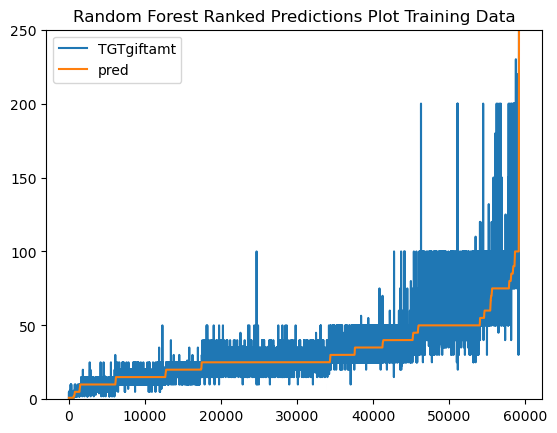

In [117]:
# visualizing performance of random forest
df.sort_values(by='pred', inplace=True)
df.reset_index(inplace=True, drop=True)
df.plot(title='Random Forest Ranked Predictions Plot Training Data')
plt.ylim((0,250))

<Axes: title={'center': 'Random Forest Actual vs. Predictions'}, xlabel='TGTgiftamt', ylabel='pred'>

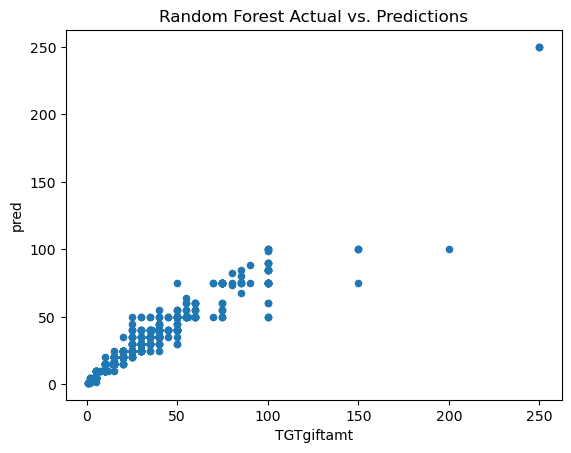

In [118]:
# visualizing random forest predictions vs actual y values
df.sample(n=1000, random_state=12345).plot(kind='scatter', x='TGTgiftamt', y='pred', title='Random Forest Actual vs. Predictions')

In [119]:
# storing decision tree predictions in dataframe for visualization
df2 = pd.DataFrame(train_responders[[y_name, 'masterprimaryid']])
df2['pred'] = trans_dt.predict(train_responders[x_names_2])
df2.loc[df2['pred'] < 0.0, 'pred'] = 0.0
df2

,TGTgiftamt,masterprimaryid,pred
75,80.0,000136CC-D469-4445-BB7C-6B7F05C36E04,80.0
128,5.0,00026531-DC7A-4A10-A63A-86CFA19829A6,5.0
149,25.0,0002F58D-87F3-4AA4-A9A9-0EB48427124C,25.0
209,15.0,0003F6B2-437C-4EB3-95F6-B9D9E7263BB8,15.0
225,25.0,00043A08-D7D4-4B7C-ACC0-F56F470E08D4,25.0
...,...,...,...
3276322,25.0,FFF9CC6C-81F2-4D28-B928-03C41696783D,25.0
3276416,40.0,FFFB7D3A-BAED-410E-AE52-5322FB71464B,40.0
3276505,50.0,FFFD2D21-AA65-4FA4-B885-B2A015D72E1D,50.0
3276538,10.0,FFFE0FCC-B7BF-41EB-8EEB-FB48FE08A169,10.0


(0.0, 250.0)

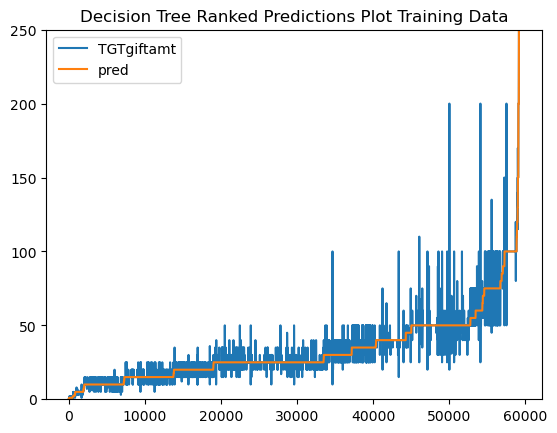

In [120]:
# visualizing performance of decision tree
df2.sort_values(by='pred', inplace=True)
df2.reset_index(inplace=True, drop=True)
df2.plot(title='Decision Tree Ranked Predictions Plot Training Data')
plt.ylim((0,250))

<Axes: title={'center': 'Decision Tree Actual vs. Predictions'}, xlabel='TGTgiftamt', ylabel='pred'>

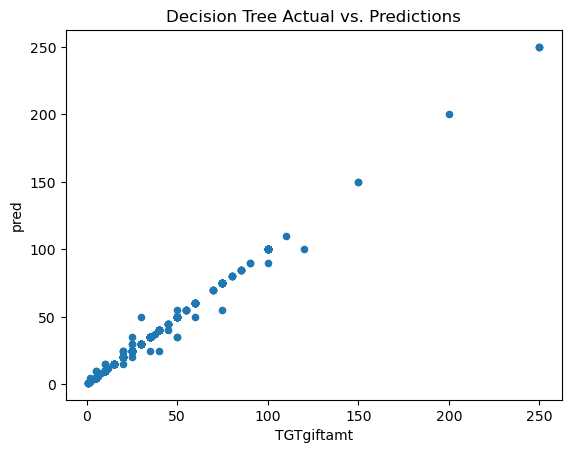

In [121]:
# visualizing decision tree predictions vs actual y values
df2.sample(n=1000, random_state=12345).plot(kind='scatter', x='TGTgiftamt', y='pred', title='Decision Tree Actual vs. Predictions')

In [122]:
# shortcut names
rf_yhat_name = 'phat_rf'
rf_r_name = 'r_rf'

# calculate predictions for transformed random forest
rf_rem_phat = pd.DataFrame(trans_rf.predict(test_responders[x_names_2]), columns=['phat_rf'])
rf_rem_phat = pd.concat([test_responders[x_names_2].reset_index(drop=True),test_responders[y_name].reset_index(drop=True), rf_rem_phat], axis=1)
# calculate residuals
rf_rem_phat[rf_r_name] = rf_rem_phat[y_name] - rf_rem_phat[rf_yhat_name]

In [123]:
rf_rem_phat.sort_values(by='r_rf', ascending=False).head()

,HPG_amount,MRG_amount,avg_gift_amt,first_gift_amount,append_direct_trans,append_fundraisingpartners,append_HouseHoldEducation,append_WealthResources,append_age,append_web,append_competitors,append_parks_nature,TGTgiftamt,phat_rf,r_rf
5331,50.0,50.0,34.090909,20.0,0,0,4,8,79.0,0,3,1,5000.0,50.0,4950.0
5859,85.0,85.0,38.181818,35.0,0,0,2,1,58.0,0,8,0,4000.0,75.0,3925.0
2174,25.0,20.0,22.500000,25.0,3,0,5,10,76.0,3,0,1,2500.0,30.0,2470.0
3552,60.0,60.0,25.000000,10.0,7,2,4,9,70.0,3,3,3,2500.0,75.0,2425.0
13843,75.0,60.0,46.818182,10.0,11,6,2,5,57.0,0,18,1,2000.0,50.0,1950.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


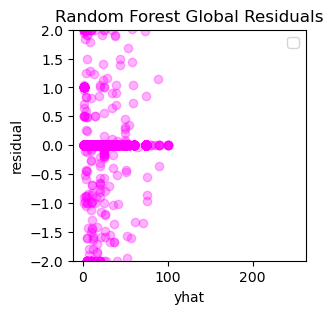

In [124]:
# initialize figure
fig, ax_ = plt.subplots(figsize=(3, 3))

# plot groups with appropriate color
color_list = ['royalblue', 'magenta']
c_idx = 0

ax_.plot(rf_rem_phat[rf_yhat_name], rf_rem_phat[rf_r_name],
             marker='o', linestyle='', color=color_list[1], alpha=0.3)
plt.ylim((-2,2))
# annotate plot
_ = plt.xlabel('yhat')
_ = plt.ylabel('residual')
_ = ax_.legend(loc=1)
_ = plt.title('Random Forest Global Residuals')

In [125]:
# shortcut names
dt_yhat_name = 'phat_dt'
dt_r_name = 'r_dt'

# calculate predictions for decision tree
dt_rem_phat = pd.DataFrame(trans_dt.predict(test_responders[x_names_2]), columns=['phat_dt'])
dt_rem_phat = pd.concat([test_responders[x_names_2].reset_index(drop=True),test_responders[y_name].reset_index(drop=True), dt_rem_phat], axis=1)
# calculate residuals
dt_rem_phat[dt_r_name] = dt_rem_phat[y_name] - dt_rem_phat[dt_yhat_name]

In [126]:
dt_rem_phat.sort_values(by='r_dt', ascending=False).head()

,HPG_amount,MRG_amount,avg_gift_amt,first_gift_amount,append_direct_trans,append_fundraisingpartners,append_HouseHoldEducation,append_WealthResources,append_age,append_web,append_competitors,append_parks_nature,TGTgiftamt,phat_dt,r_dt
5331,50.0,50.0,34.090909,20.0,0,0,4,8,79.0,0,3,1,5000.0,55.0,4945.0
5859,85.0,85.0,38.181818,35.0,0,0,2,1,58.0,0,8,0,4000.0,50.0,3950.0
2174,25.0,20.0,22.500000,25.0,3,0,5,10,76.0,3,0,1,2500.0,20.0,2480.0
3552,60.0,60.0,25.000000,10.0,7,2,4,9,70.0,3,3,3,2500.0,100.0,2400.0
13843,75.0,60.0,46.818182,10.0,11,6,2,5,57.0,0,18,1,2000.0,110.0,1890.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


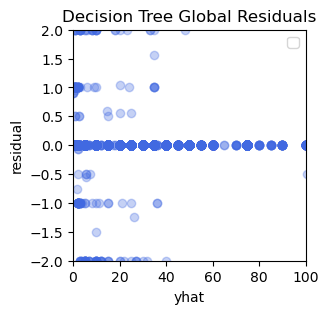

In [127]:
# initialize figure
fig, ax_ = plt.subplots(figsize=(3, 3))

# plot groups with appropriate color
color_list = ['royalblue', 'magenta']
c_idx = 0

ax_.plot(dt_rem_phat[dt_yhat_name], dt_rem_phat[dt_r_name],
             marker='o', linestyle='', color=color_list[0], alpha=0.3)
plt.ylim((-2,2))
plt.xlim((0,100))
# annotate plot
_ = plt.xlabel('yhat')
_ = plt.ylabel('residual')
_ = ax_.legend(loc=1)
_ = plt.title('Decision Tree Global Residuals')

In [128]:
n_remove = 200
rf_rem_data = rf_rem_phat.copy(deep=True)
rf_rem_data.drop(list(rf_rem_phat.sort_values(by='r_rf', ascending=False).tail(n=n_remove).index), axis=0, inplace=True)
rf_rem_data.drop(list(rf_rem_phat.sort_values(by='r_rf', ascending=False).head(n=n_remove).index), axis=0, inplace=True)

In [129]:
np.random.seed(SEED) # preserve exact reproducibility for this cell

# execute split
split = np.random.rand(len(rf_rem_data)) < split_ratio
rf_rem_train = rf_rem_data[split]
rf_rem_valid = rf_rem_data[~split]

# summarize split
print('Random Forest remediated train data rows = %d, columns = %d' % (rf_rem_train.shape[0], rf_rem_train.shape[1]))
print('Random Forest remediated validation data rows = %d, columns = %d' % (rf_rem_valid.shape[0], rf_rem_valid.shape[1]))

# retrain
rf_2 = trans_rf
rf_2.fit(rf_rem_train[x_names_2], rf_rem_train[y_name])
rf_rem_ypred = rf_2.predict(rf_rem_valid[x_names_2])
rf_rem_mae_pred = round(mean_absolute_error(rf_rem_valid[y_name], rf_rem_ypred),3)
print('Random Forest Remediated under-sampled MAE: %.4f.' % rf_rem_mae_pred)

Random Forest remediated train data rows = 17591, columns = 15
Random Forest remediated validation data rows = 7671, columns = 15
Random Forest Remediated under-sampled MAE: 7.7580.


In [130]:
n_remove = 200
dt_rem_data = dt_rem_phat.copy(deep=True)
dt_rem_data.drop(list(dt_rem_phat.sort_values(by='r_dt', ascending=False).tail(n=n_remove).index), axis=0, inplace=True)
dt_rem_data.drop(list(dt_rem_phat.sort_values(by='r_dt', ascending=False).head(n=n_remove).index), axis=0, inplace=True)

In [131]:
np.random.seed(SEED) # preserve exact reproducibility for this cell

# execute split
split = np.random.rand(len(dt_rem_data)) < split_ratio
dt_rem_train = dt_rem_data[split]
dt_rem_valid = dt_rem_data[~split]

# summarize split
print('Decision Tree remediated train data rows = %d, columns = %d' % (dt_rem_train.shape[0], dt_rem_train.shape[1]))
print('Decision tree remediated validation data rows = %d, columns = %d' % (dt_rem_valid.shape[0], dt_rem_valid.shape[1]))

# retrain
dt_2 = trans_dt
dt_2.fit(dt_rem_train[x_names_2], dt_rem_train[y_name])
dt_trans_yhat = trans_dt.predict(test_responders[x_names_2])
dt_rem_ypred = dt_2.predict(dt_rem_valid[x_names_2])
dt_rem_mae_pred = round(mean_absolute_error(dt_rem_valid[y_name], dt_rem_ypred),3)
print('Decision Tree Remediated under-sampled MAE: %.4f.' % dt_rem_mae_pred)

Decision Tree remediated train data rows = 17591, columns = 15
Decision tree remediated validation data rows = 7671, columns = 15
Decision Tree Remediated under-sampled MAE: 11.5770.


In [143]:
ypred_test_og = rf.predict(valid[x_names_2])
round(mean_absolute_error(valid[y_name], ypred_test_og),3)

32.723

In [144]:
ypred_test = rf_2.predict(valid[x_names_2])

In [145]:
round(mean_absolute_error(valid[y_name], ypred_test),3)

29.288

In [147]:
ypred_test2_og = dt.predict(valid[x_names_2])
round(mean_absolute_error(valid[y_name], ypred_test2_og),3)

33.017

In [148]:
ypred_test2 = dt_2.predict(valid[x_names_2])

In [149]:
round(mean_absolute_error(valid[y_name], ypred_test2),3)

30.965

### Average Phase 2 Model Results

In [150]:
result2 = pd.DataFrame(valid[['masterprimaryid', 'TGTgiftamt']])
result2['pred1'] = ypred_test
result2.loc[result2['pred1'] < 0.0, 'pred1'] = 0.0
result2

,masterprimaryid,TGTgiftamt,pred1
0,000004E1-D14E-42AB-A384-40A2773F507C,0.0,15.0
6,000026B3-046F-4E71-9C90-9BDEF05882F5,0.0,20.0
8,000026B3-046F-4E71-9C90-9BDEF05882F5,0.0,20.0
10,0000357F-B1E3-4A2E-9736-345D032DA73E,0.0,15.0
11,0000357F-B1E3-4A2E-9736-345D032DA73E,0.0,15.0
...,...,...,...
3276636,FFFFCA06-BA99-4475-B616-FA84CAB719BB,0.0,25.0
3276637,FFFFD24D-7BE2-41BD-9245-F19C69DCF614,0.0,25.0
3276643,FFFFE9E1-08C2-4236-813A-2F010F37A078,0.0,30.0
3276644,FFFFE9E1-08C2-4236-813A-2F010F37A078,0.0,40.0


In [151]:
tree2df = pd.DataFrame(valid['TGTgiftamt'])
tree2df['pred2'] = ypred_test2
tree2df.loc[tree2df['pred2'] < 0.0, 'pred2'] = 0.0
tree2df

,TGTgiftamt,pred2
0,0.0,10.0
6,0.0,25.0
8,0.0,25.0
10,0.0,25.0
11,0.0,10.0
...,...,...
3276636,0.0,25.0
3276637,0.0,10.0
3276643,0.0,25.0
3276644,0.0,30.0


In [152]:
result2['pred'] = ((result2['pred1'] + tree2df['pred2']) / 2)
result2 = result2.drop(columns=['pred1'])
result2

,masterprimaryid,TGTgiftamt,pred
0,000004E1-D14E-42AB-A384-40A2773F507C,0.0,12.5
6,000026B3-046F-4E71-9C90-9BDEF05882F5,0.0,22.5
8,000026B3-046F-4E71-9C90-9BDEF05882F5,0.0,22.5
10,0000357F-B1E3-4A2E-9736-345D032DA73E,0.0,20.0
11,0000357F-B1E3-4A2E-9736-345D032DA73E,0.0,12.5
...,...,...,...
3276636,FFFFCA06-BA99-4475-B616-FA84CAB719BB,0.0,25.0
3276637,FFFFD24D-7BE2-41BD-9245-F19C69DCF614,0.0,17.5
3276643,FFFFE9E1-08C2-4236-813A-2F010F37A078,0.0,27.5
3276644,FFFFE9E1-08C2-4236-813A-2F010F37A078,0.0,35.0


(0.0, 500.0)

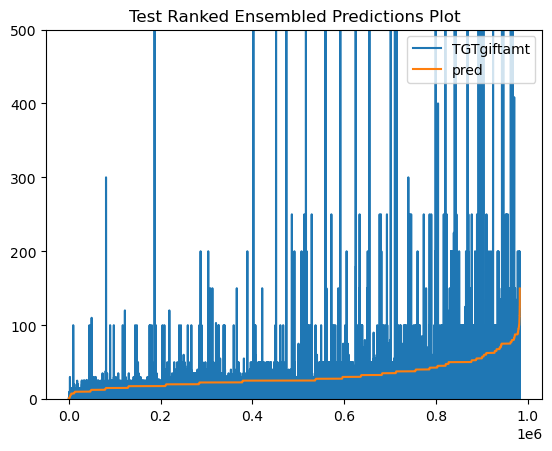

In [153]:
graph_result2 = result2.copy(deep=True)
graph_result2.sort_values(by='pred', inplace=True)
graph_result2.reset_index(inplace=True, drop=True)
graph_result2.plot(title='Test Ranked Ensembled Predictions Plot')
plt.ylim(0, 500)

(0.0, 250.0)

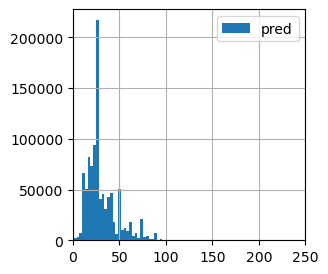

In [154]:
_ = graph_result2['pred'].hist(bins=50, figsize=(3, 3), legend='pred')
plt.xlim(0, 250)

(0.0, 250.0)

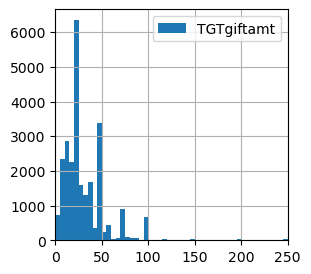

In [193]:
_ = test_responders['TGTgiftamt'].hist(bins=1000, figsize=(3, 3), legend='TGTgiftamt')
plt.xlim(0, 250)

In [156]:
round(mean_absolute_error(result2['TGTgiftamt'], result2['pred']),3)

30.124

### Results

In [157]:
result1

,masterprimaryid,TGTresp,pred,TGT_pred
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0.181639,0
6,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.092779,0
8,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.092779,0
10,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.461162,0
11,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.470031,0
...,...,...,...,...
3276636,FFFFCA06-BA99-4475-B616-FA84CAB719BB,0,0.112554,0
3276637,FFFFD24D-7BE2-41BD-9245-F19C69DCF614,0,0.223448,0
3276643,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.308729,0
3276644,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.411727,0


In [158]:
result2

,masterprimaryid,TGTgiftamt,pred
0,000004E1-D14E-42AB-A384-40A2773F507C,0.0,12.5
6,000026B3-046F-4E71-9C90-9BDEF05882F5,0.0,22.5
8,000026B3-046F-4E71-9C90-9BDEF05882F5,0.0,22.5
10,0000357F-B1E3-4A2E-9736-345D032DA73E,0.0,20.0
11,0000357F-B1E3-4A2E-9736-345D032DA73E,0.0,12.5
...,...,...,...
3276636,FFFFCA06-BA99-4475-B616-FA84CAB719BB,0.0,25.0
3276637,FFFFD24D-7BE2-41BD-9245-F19C69DCF614,0.0,17.5
3276643,FFFFE9E1-08C2-4236-813A-2F010F37A078,0.0,27.5
3276644,FFFFE9E1-08C2-4236-813A-2F010F37A078,0.0,35.0


In [159]:
final = result1.merge(result2, left_index=True, right_index=True)

In [160]:
final

,masterprimaryid_x,TGTresp,pred_x,TGT_pred,masterprimaryid_y,TGTgiftamt,pred_y
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0.181639,0,000004E1-D14E-42AB-A384-40A2773F507C,0.0,12.5
6,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.092779,0,000026B3-046F-4E71-9C90-9BDEF05882F5,0.0,22.5
8,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0.092779,0,000026B3-046F-4E71-9C90-9BDEF05882F5,0.0,22.5
10,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.461162,0,0000357F-B1E3-4A2E-9736-345D032DA73E,0.0,20.0
11,0000357F-B1E3-4A2E-9736-345D032DA73E,0,0.470031,0,0000357F-B1E3-4A2E-9736-345D032DA73E,0.0,12.5
...,...,...,...,...,...,...,...
3276636,FFFFCA06-BA99-4475-B616-FA84CAB719BB,0,0.112554,0,FFFFCA06-BA99-4475-B616-FA84CAB719BB,0.0,25.0
3276637,FFFFD24D-7BE2-41BD-9245-F19C69DCF614,0,0.223448,0,FFFFD24D-7BE2-41BD-9245-F19C69DCF614,0.0,17.5
3276643,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.308729,0,FFFFE9E1-08C2-4236-813A-2F010F37A078,0.0,27.5
3276644,FFFFE9E1-08C2-4236-813A-2F010F37A078,0,0.411727,0,FFFFE9E1-08C2-4236-813A-2F010F37A078,0.0,35.0


In [161]:
final['pred_y'].fillna(0.0, inplace=True)
final['final_score'] = final['pred_x']*final['pred_y']
#result1['TGTgiftamt'] = result2['TGTgiftamt']


In [162]:
max(final['final_score'])

94.7970663011248

In [184]:
min(final['final_score'])

0.0

In [163]:
final['final_score'].mean()

8.201380957761382

In [164]:
final.sort_values(by=['final_score'], inplace=True, ascending=False)
final = final.drop(columns=['TGTgiftamt', 'TGT_pred', 'masterprimaryid_y'])

In [166]:
final['decile'] = pd.qcut(final['final_score'], 10, labels=False)

In [168]:
final['final_score'].describe()

count    983103.000000
mean          8.201381
std           7.469905
min           0.000000
25%           3.309047
50%           5.744265
75%          10.474867
max          94.797066
Name: final_score, dtype: float64

In [169]:
dec_groups = final.groupby(['decile']).count()
dec_groups

,masterprimaryid_x,TGTresp,pred_x,pred_y,final_score
decile,,,,,
0,98312,98312,98312,98312,98312
1,98310,98310,98310,98310,98310
2,98309,98309,98309,98309,98309
3,98311,98311,98311,98311,98311
4,98310,98310,98310,98310,98310
5,98310,98310,98310,98310,98310
6,98310,98310,98310,98310,98310
7,98310,98310,98310,98310,98310
8,98310,98310,98310,98310,98310


In [171]:
resp_groups = final.groupby(['TGTresp']).count()
resp_groups

,masterprimaryid_x,pred_x,pred_y,final_score,decile
TGTresp,,,,,
0,957441,957441,957441,957441,957441
1,25662,25662,25662,25662,25662


In [172]:
num_responders = 25662
num_norespond = 957441

In [173]:
decile_counts = {}

for decile in range(10):
    count = final[(final['decile'] == decile) & (final['TGTresp'] == 1)].shape[0]
    decile_counts[decile] = count
decile_counts

{0: 933,
 1: 1009,
 2: 1373,
 3: 1547,
 4: 1852,
 5: 2264,
 6: 2895,
 7: 3464,
 8: 4338,
 9: 5987}

In [174]:
(final.groupby('decile').get_group(9).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.23330215883407374

In [175]:
(final.groupby('decile').get_group(8).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.1690437222352116

In [176]:
(final.groupby('decile').get_group(7).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.13498558179409242

In [177]:
(final.groupby('decile').get_group(6).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.11281271919569792

In [178]:
(final.groupby('decile').get_group(5).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.08822383290468397

In [179]:
(final.groupby('decile').get_group(4).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.07216896578598707

In [180]:
(final.groupby('decile').get_group(3).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.06028368794326241

In [181]:
(final.groupby('decile').get_group(2).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.053503234354298185

In [182]:
(final.groupby('decile').get_group(1).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.03931883719117762

In [183]:
(final.groupby('decile').get_group(0).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.03635725976151508